In [1]:
from google.colab import files
files.upload()


Saving testing_data_lowercase_nolabels.csv to testing_data_lowercase_nolabels.csv
Saving training_data_lowercase.csv to training_data_lowercase.csv


{'testing_data_lowercase_nolabels.csv': b'\xef\xbb\xbf2\tcopycat muslim terrorist arrested with assault weapons\r\n2\twow! chicago protester caught on camera admits violent activity was pre-planned: \xe2\x80\x9ait\xe2\x80\x9as not gonna be peaceful\xe2\x80\x9a\r\n2\tgermany\'s fdp look to fill schaeuble\'s big shoes\r\n2\tmi school sends welcome back packet warning kids against wearing u.s. flag to school\r\n2\tu.n. seeks \'massive\' aid boost amid rohingya \'emergency within an emergency\'\r\n2\tdid oprah just leave \xe2\x80\x9anasty\xe2\x80\x9a hillary wishing she wouldn\xe2\x80\x9at have endorsed her? [video]\r\n2\tfrance\'s macron says his job not \'cool\' cites talks with turkey\'s erdogan\r\n2\tflashback: chilling \xe2\x80\x9a60 minutes\xe2\x80\x9a interview with george soros nearly 20 years ago\r\n2\tspanish foreign ministry says to expel north korean ambassador\r\n2\ttrump says cuba \'did some bad things\' aimed at u.s. diplomats\r\n2\tmerkel names refugee expert as foreign pol

## 1. INSTALL (only needed in Colab)

In [2]:
# Uncomment if running in Colab
!pip install sentence-transformers

## 2. IMPORTS

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sentence_transformers import SentenceTransformer

## 3. LOAD DATA

### Expected files in the same folder:
*   `training_data_lowercase.csv`
*   `testing_data_lowercase_nolabs.csv`

**Please ensure these files are uploaded to your Colab environment before running this cell.**

In [4]:
print("Loading data...")

# Read the CSV with tab separator and no header
df = pd.read_csv("training_data_lowercase.csv", sep='\t', header=None)

# Assign meaningful column names based on the file's structure
df.columns = ["label", "text"]

print("Shape:", df.shape)
print(df.head())

TEXT_COL = "text"
LABEL_COL = "label"

X = df[TEXT_COL]
y = df[LABEL_COL]

Loading data...
Shape: (34152, 2)
   label                                               text
0      0  donald trump sends out embarrassing new year‚s...
1      0  drunk bragging trump staffer started russian c...
2      0  sheriff david clarke becomes an internet joke ...
3      0  trump is so obsessed he even has obama‚s name ...
4      0  pope francis just called out donald trump duri...


## 4. TRAIN / TEST SPLIT

In [5]:
print("\nSplitting dataset...")

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))


Splitting dataset...
Train size: 27321
Test size: 6831


## 5. MODEL 1 — TFIDF + LOGISTIC REGRESSION

In [6]:
print("\n==============================")
print("MODEL 1: TFIDF + Logistic")
print("==============================")

vectorizer = TfidfVectorizer(max_features=20000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

model1 = LogisticRegression(max_iter=1000)
model1.fit(X_train_vec, y_train)

pred1 = model1.predict(X_test_vec)

acc1 = accuracy_score(y_test, pred1)

print("Accuracy:", acc1)
print(classification_report(y_test, pred1))


MODEL 1: TFIDF + Logistic
Accuracy: 0.9436392914653784
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3515
           1       0.93      0.95      0.94      3316

    accuracy                           0.94      6831
   macro avg       0.94      0.94      0.94      6831
weighted avg       0.94      0.94      0.94      6831



In [9]:
text = ["This article is totally fake and shocking"]

x = vectorizer.transform(text)
pred = model1.predict(x)

print(pred)


[0]


## 6. MODEL 2 — EMBEDDINGS + LOGISTIC REGRESSION

In [10]:
print("\n==============================")
print("MODEL 2: Embeddings + Logistic")
print("==============================")

embedder = SentenceTransformer("all-MiniLM-L6-v2")

X_train_emb = embedder.encode(X_train.tolist())
X_test_emb  = embedder.encode(X_test.tolist())

model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train_emb, y_train)

pred2 = model2.predict(X_test_emb)

acc2 = accuracy_score(y_test, pred2)

print("Accuracy:", acc2)
print(classification_report(y_test, pred2))


MODEL 2: Embeddings + Logistic


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/103 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/all-MiniLM-L6-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Accuracy: 0.9254867515737081
              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3515
           1       0.91      0.94      0.92      3316

    accuracy                           0.93      6831
   macro avg       0.93      0.93      0.93      6831
weighted avg       0.93      0.93      0.93      6831



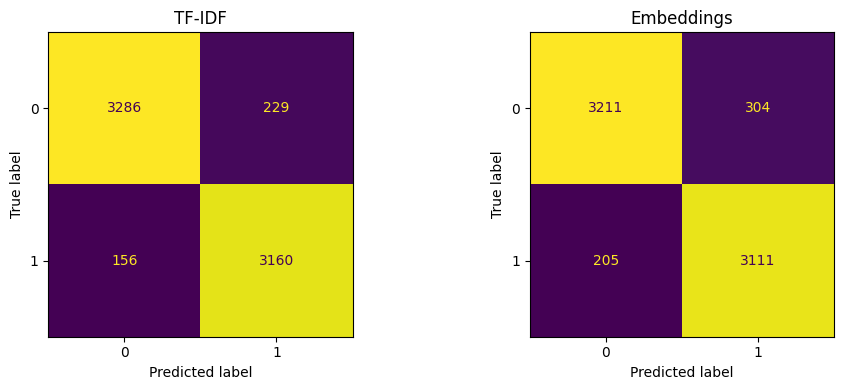

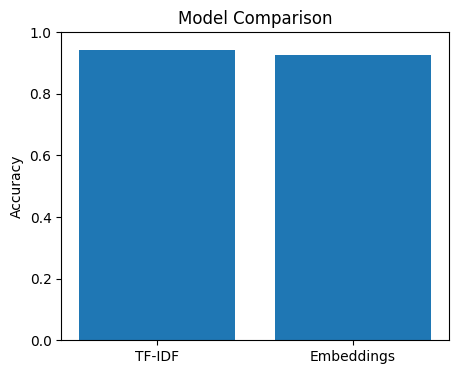

In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ===== CONFUSION MATRICES =====
fig, ax = plt.subplots(1, 2, figsize=(10,4))

cm1 = confusion_matrix(y_test, pred1)
ConfusionMatrixDisplay(cm1).plot(ax=ax[0], colorbar=False)
ax[0].set_title("TF-IDF")

cm2 = confusion_matrix(y_test, pred2)
ConfusionMatrixDisplay(cm2).plot(ax=ax[1], colorbar=False)
ax[1].set_title("Embeddings")

plt.tight_layout()
plt.show()


# ===== ACCURACY BAR PLOT =====
plt.figure(figsize=(5,4))
plt.bar(["TF-IDF", "Embeddings"], [acc1, acc2])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()


## 7. FINAL COMPARISON

In [12]:
print("\n==============================")
print("FINAL RESULTS")
print("==============================")

print("TFIDF accuracy:      ", acc1)
print("Embeddings accuracy: ", acc2)


if acc1 > acc2:
    print("Best model: TFIDF")
else:
    print("Best model: Embeddings")


print("\nDone.")


FINAL RESULTS
TFIDF accuracy:       0.9436392914653784
Embeddings accuracy:  0.9254867515737081
Best model: TFIDF

Done.


In [14]:
from pathlib import Path
import joblib

# create folder to store models
models_dir = Path("models")
models_dir.mkdir(exist_ok=True)

# save TF-IDF model
joblib.dump(model1, models_dir / "tfidf_model.joblib")

# save Embeddings classifier
joblib.dump(model2, models_dir / "embeddings_model.joblib")

# save sentence embedder (needed to encode new text)
joblib.dump(embedder, models_dir / "sentence_embedder.joblib")

print("All models saved successfully inside ./models/")


All models saved successfully inside ./models/
